### Loading the dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the hate crime dataset

In [2]:
df = pd.read_csv("hate_crime.csv", low_memory=False)
df.shape

(219577, 28)

In [3]:
df.head().T

,0,1,2,3,4
INCIDENT_ID,3015,3016,43,44,3017
DATA_YEAR,1991,1991,1991,1991,1991
ORI,AR0040200,AR0290100,AR0350100,AR0350100,AR0350100
PUB_AGENCY_NAME,Rogers,Hope,Pine Bluff,Pine Bluff,Pine Bluff
PUB_AGENCY_UNIT,NaN,NaN,NaN,NaN,NaN
AGENCY_TYPE_NAME,City,City,City,City,City
STATE_ABBR,AR,AR,AR,AR,AR
STATE_NAME,Arkansas,Arkansas,Arkansas,Arkansas,Arkansas
DIVISION_NAME,West South Central,West South Central,West South Central,West South Central,West South Central
REGION_NAME,South,South,South,South,South


In [4]:
# Converting column names to lower case for convenience purpose
df= df.rename(columns=str.lower)

### Changing the data type of date values

In [5]:
df['incident_date'] = pd.to_datetime(df['incident_date'], format = '%d-%b-%y')

In [6]:
# Check the percentages of missing value
df.isnull().sum() / df.shape[0] * 100

incident_id                  0.000000
data_year                    0.000000
ori                          0.000000
pub_agency_name              0.000000
pub_agency_unit             97.071187
agency_type_name             0.000000
state_abbr                   0.000000
state_name                   0.000000
division_name                0.000000
region_name                  0.000000
population_group_code        0.000000
population_group_desc        0.000000
incident_date                0.000000
adult_victim_count          76.586346
juvenile_victim_count       77.438894
total_offender_count         0.000000
adult_offender_count        78.536003
juvenile_offender_count     78.539191
offender_race                0.009108
offender_ethnicity          84.118100
victim_count                 0.000000
offense_name                 0.000000
total_individual_victims     1.584410
location_name                0.000000
bias_desc                    0.000000
victim_types                 0.000000
multiple_off

Columns with a very high percentage of missing values seem to be unimportant for tha analysis. So, they are going to be dropped from the dataframe.

The column 'total_individual_victims' has 1.58% missing values but it also seems unnecessary so dropping that column as well.

In [7]:
df.drop(['pub_agency_unit','adult_victim_count','juvenile_victim_count','adult_offender_count',\
         'juvenile_offender_count','offender_ethnicity'], axis=1, inplace=True)
df.drop(['total_individual_victims'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219577 entries, 0 to 219576
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   incident_id            219577 non-null  int64         
 1   data_year              219577 non-null  int64         
 2   ori                    219577 non-null  object        
 3   pub_agency_name        219577 non-null  object        
 4   agency_type_name       219577 non-null  object        
 5   state_abbr             219577 non-null  object        
 6   state_name             219577 non-null  object        
 7   division_name          219577 non-null  object        
 8   region_name            219577 non-null  object        
 9   population_group_code  219577 non-null  object        
 10  population_group_desc  219577 non-null  object        
 11  incident_date          219577 non-null  datetime64[ns]
 12  total_offender_count   219577 non-null  int6

## Answers of the research questions
How many hate crime incidents were there in each year?

<AxesSubplot:title={'center':'Incident counts by Year'}, xlabel='Year', ylabel='Number of incidents'>

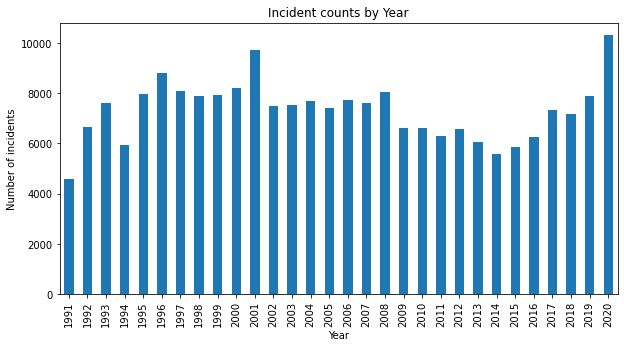

In [9]:
incident_counts = df.groupby(['data_year']).count().incident_id
incident_counts.plot(kind='bar', title='Incident counts by Year', ylabel='Number of incidents',
         xlabel='Year', figsize=(10, 5))

Interestingly enough, there's quite a upsurge in incident counts in the year 2001 and 2020.

In [25]:
print(f'In the year 2001 and 2020, total number of incidents were {incident_counts.at[2001,]} \
and {incident_counts.at[2020,]} respectively.')



In the year 2001 and 2020, total number of incidents were 9730 and 10299 respectively.


Let's just focus on hate crime of 2020 only.

In [29]:
df2020 = df[df['data_year']==2020]
df2020.head()

,incident_id,data_year,ori,pub_agency_name,agency_type_name,state_abbr,state_name,division_name,region_name,population_group_code,...,incident_date,total_offender_count,offender_race,victim_count,offense_name,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
209278,864279,2020,AK0010100,Anchorage,City,AK,Alaska,Pacific,West,1C,...,2020-01-24,0,Unknown,2,Arson;Burglary/Breaking & Entering,Church/Synagogue/Temple/Mosque,Anti-Other Christian,Religious Organization,M,S
209279,1054279,2020,AK0010100,Anchorage,City,AK,Alaska,Pacific,West,1C,...,2020-06-01,1,Unknown,1,Sexual Assault With An Object,Park/Playground,Anti-Female,Individual,S,S
209280,1054280,2020,AK0010100,Anchorage,City,AK,Alaska,Pacific,West,1C,...,2020-06-21,1,American Indian or Alaska Native,1,Aggravated Assault,Hotel/Motel/Etc.,Anti-Black or African American,Individual,S,S
209281,1225414,2020,AK0010100,Anchorage,City,AK,Alaska,Pacific,West,1C,...,2020-09-22,1,Unknown,1,Simple Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
209282,1225415,2020,AK0010100,Anchorage,City,AK,Alaska,Pacific,West,1C,...,2020-07-17,1,White,1,Aggravated Assault,Parking/Drop Lot/Garage,Anti-Black or African American,Individual,S,S
